   Insurance Cross Sell Prediction

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [5]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

Let us convet the object data types to integers.

In [9]:
df = pd.get_dummies(df,columns=['Gender','Vehicle_Damage','Vehicle_Age'])

In [10]:
df

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,1,0,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,1,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,1,0,0,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,1,0,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,30170.0,26.0,88,0,0,1,1,0,1,0,0
381105,381106,30,1,37.0,1,40016.0,152.0,131,0,0,1,1,0,0,1,0
381106,381107,21,1,30.0,1,35118.0,160.0,161,0,0,1,1,0,0,1,0
381107,381108,68,1,14.0,0,44617.0,124.0,74,0,1,0,0,1,0,0,1


In [11]:
df = df.drop("id",axis=1)

In [12]:
df['Region_Code'].value_counts()

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [13]:
len(df['Region_Code'].unique())

53

The region code numbers do not make any sense.

We need to provide proper weights to region code based on the mean response. 

In [14]:
Mean_encoded_subject = df.groupby(['Region_Code'])['Response'].mean().to_dict() 
df['Region_Code'] =  df['Region_Code'].map(Mean_encoded_subject) 

Mean_encoded_subject = df.groupby(['Policy_Sales_Channel'])['Response'].mean().to_dict() 
df['Policy_Sales_Channel'] =  df['Policy_Sales_Channel'].map(Mean_encoded_subject) 

df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,1,0.187163,0,40454.0,0.199385,217,1,0,1,0,1,0,0,1
1,76,1,0.127662,0,33536.0,0.199385,183,0,0,1,1,0,1,0,0
2,47,1,0.187163,0,38294.0,0.199385,27,1,0,1,0,1,0,0,1
3,21,1,0.112760,1,28619.0,0.028624,203,0,0,1,1,0,0,1,0
4,29,1,0.121776,1,27496.0,0.028624,39,0,1,0,1,0,0,1,0


.

SAMPLING

In [15]:
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

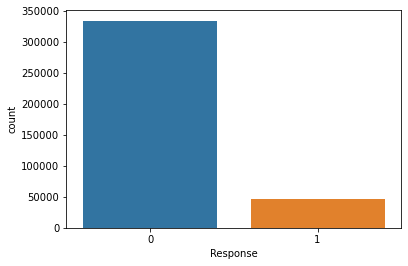

In [16]:
sns.countplot(df['Response'])

In [17]:
df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

.

As we saw earlier in our target variable Response we have a huge imbalance. So the best way to move forward is to either Undersample or Oversample the data. This way we can bring overall balance to both classes in dataset.

Here, we are overrsampling the data with SMOTE algorithm where it synthesize new examples from the minority class.

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

.

In [18]:
y = df['Response']
x = df.drop('Response',axis = 1)

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    334399
1    334399
Name: Response, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

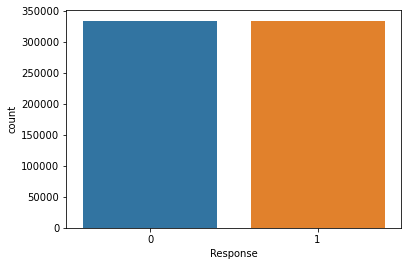

In [20]:
sns.countplot(y_sm)

<AxesSubplot:>

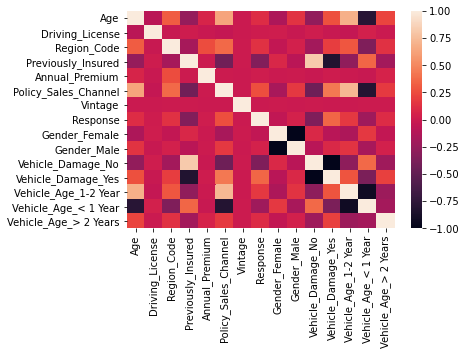

In [21]:
sns.heatmap(df.corr())

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 0,stratify = y_sm)

In [23]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.8497607655502393


In [27]:
cm = confusion_matrix(y_test,y_pred)

cm

array([[53445, 13435],
       [ 6661, 60219]], dtype=int64)

In [28]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84     66880
           1       0.82      0.90      0.86     66880

    accuracy                           0.85    133760
   macro avg       0.85      0.85      0.85    133760
weighted avg       0.85      0.85      0.85    133760



Logit is the function which is used by our logistic regression model, with this we can go for an analysis of the result obtained based on the data we have using logit function. We can thus obtain the coeffecients of all the variables, their standar errors and z value.

In [29]:
import statsmodels.api as sm

In [30]:
logit_model=sm.Logit(y_test,x_test)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.279671
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               133760
Model:                          Logit   Df Residuals:                   133746
Method:                           MLE   Df Model:                           13
Date:                Fri, 07 Jan 2022   Pseudo R-squ.:                  0.5965
Time:                        14:53:56   Log-Likelihood:                -37409.
converged:                       True   LL-Null:                       -92715.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4116      0.012    -33.081      0.000      -0.436      -0.387
x2             0.0334      0

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train) 

y_pred = model.predict(x_test)

print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.9124177631578947


In [32]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     66880
           1       0.93      0.89      0.91     66880

    accuracy                           0.91    133760
   macro avg       0.91      0.91      0.91    133760
weighted avg       0.91      0.91      0.91    133760



In [33]:
from xgboost import XGBClassifier

xg_model = XGBClassifier()
xg_model.fit(x_train, y_train) 

y_pred = xg_model.predict(x_test)

print("Accuracy", accuracy_score(y_test, y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.9195499401913876


In [34]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92     66880
           1       0.97      0.86      0.91     66880

    accuracy                           0.92    133760
   macro avg       0.93      0.92      0.92    133760
weighted avg       0.93      0.92      0.92    133760



Text(0.5, 1.0, 'components vs explained varaiance')

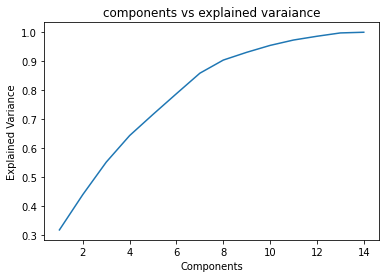

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(x_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, exp_var_cumul.shape[0] + 1),
    exp_var_cumul)

plt.xlabel('Components')
plt.ylabel('Explained Variance')

plt.title('components vs explained varaiance')

Since 9 variables explain 90% of the variance :

In [41]:
pca = PCA(n_components=9)

x_pca = pca.fit_transform(x_sm)

In [42]:
pca.n_components_

9

In [43]:
x_train_pca,x_test_pca,y_train,y_test = train_test_split(x_pca,y_sm,test_size=0.2,stratify=y_sm,random_state=0)

In [44]:
xg_model = XGBClassifier()
xg_model.fit(x_train_pca, y_train) 

y_pred = xg_model.predict(x_test_pca)

print("Accuracy", accuracy_score(y_test, y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.8534539473684211


In [45]:
print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.80      0.85     66880
           1       0.82      0.91      0.86     66880

    accuracy                           0.85    133760
   macro avg       0.86      0.85      0.85    133760
weighted avg       0.86      0.85      0.85    133760



C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<Figure size 432x288 with 0 Axes>

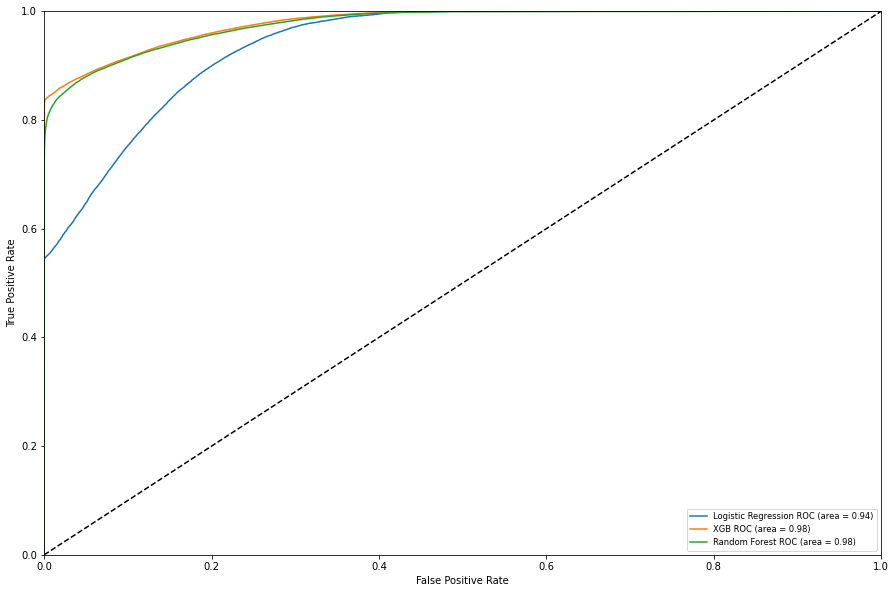

In [46]:
log_model = LogisticRegression()

xg_model = XGBClassifier()

random_model = RandomForestClassifier()


models = [
    {
        'label': 'Logistic Regression',
        'model': log_model
    },
    {
        'label': 'XGB',
        'model': xg_model
    },
    {
        'label': 'Random Forest',
        'model': random_model
    }
]

from sklearn.metrics import roc_curve, roc_auc_score, auc

plt.clf()

plt.figure(figsize=(15,10))

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(x_train,y_train).predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')

plt.show()